# ICS 561 Qiskit Tutorial 
# This files shows how to import the standard Qiskit libraries and how to create and test quantum circuits 
# Feel free to use any part of this code in your assigments. 
# 
# Sultan Almuhammadi, 26 November 2022,  Sultan Almuhammadi
#  

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

done setup
Done.. Draw circuit:


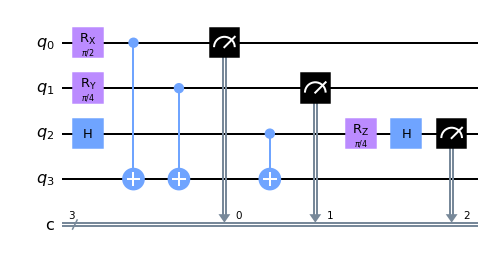

In [3]:
import qiskit as q
import math   # for Pi and other math functions 
from qiskit.visualization import plot_histogram, plot_bloch_multivector
qasm_sim= q.Aer.get_backend("qasm_simulator")  #Choose to run the code on a simulator or a real quantum computer
statevec_sim = q.Aer.get_backend("statevector_simulator")
print("done setup")

# This circuit to practice Qiskit (gives hints to HW5)
c = q.QuantumCircuit(4,3)   # create a circuit with 4 qubits and 3 cbits. The cbits are needed to store the measerued qubits values. 
c.rx(math.pi/2, 0)   # Rotate qbit-0 90 degrees on X
c.ry(math.pi/4, 1)   # Rorate qbit-1 45 degrees on Y
c.h(2)   # apply H gate on qbit-2
c.cnot(0,3)  # apply CNot gate on qubits (0 and 1)
c.cnot(1,3)  # apply CNot gate on qubits (1 and 3)
c.cnot(2,3)  # apply CNot gate on qubits (2 and 3)
c.rz(math.pi/4, 2)  # Rotate qbit-2 45 degrees on Z
c.h(2)  # Apply H gate again on qbit-2

c.measure([0,1,2], [0,1,2])   # measure qubits [0,1,2] and store the results in cbit [0,1,2]
psi0 = q.execute(c,backend=statevec_sim).result().get_statevector()
print("Done.. Draw circuit:")
c.draw()





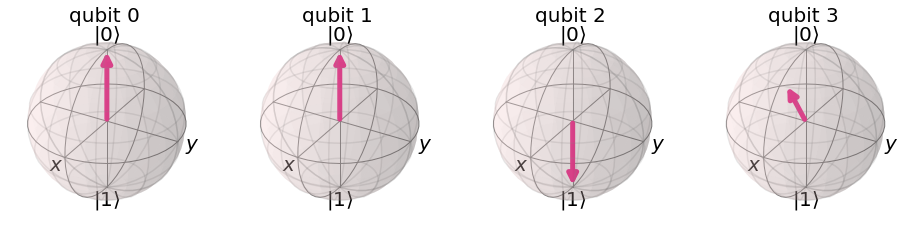

In [4]:
plot_bloch_multivector(psi0)


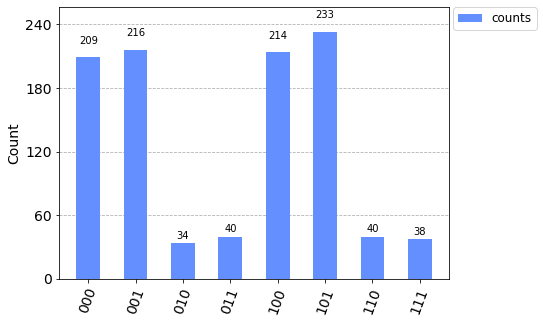

In [5]:

count1 = q.execute(c,backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([count1], legend=['counts'] )